In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Cargar los datos
file_path = "Respuestas.xlsx"  # Ruta del archivo
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")



### **Explicación**
1. **Importación de librerías:**  
   - `pandas`: Para manipular y analizar datos tabulares.  
   - `numpy`: Para cálculos matemáticos y estadísticos avanzados.  
   - `matplotlib` y `seaborn`: Para la creación y personalización de gráficos.  

2. **Estilo de gráficos:**  
   Configuramos los gráficos con un diseño limpio y una paleta de colores agradable para facilitar la interpretación visual de los resultados.

3. **Carga de datos:**  
   Se utiliza la función `pd.read_excel` para leer el archivo **`Respuestas.xlsx`**, seleccionando la hoja específica `Respuestas de formulario 1`.  




# Problema 1
### Descripción:
Calculamos el **coeficiente de correlación** entre las variables **edad** y el nivel de conocimiento en Inteligencia Artificial (IA) (convertido a valores numéricos) para medir la relación lineal entre estas dos variables. 

El coeficiente de correlación (\( r \)) varía entre -1 y 1:
- Valores cercanos a 1 indican una fuerte correlación positiva.
- Valores cercanos a -1 indican una fuerte correlación negativa.
- Valores cercanos a 0 indican poca o ninguna correlación.

---


In [7]:
# Convertir los niveles de conocimiento en IA a valores numéricos
conocimiento_ia_map = {'Ninguno': 0, 'Básico': 1, 'Intermedio': 2, 'Avanzado': 3}
df['Conocimiento_IA_Num'] = df['¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)? '].map(conocimiento_ia_map)

# Calcular coeficiente de correlación
correlacion = df['Edad'].corr(df['Conocimiento_IA_Num'])

print(f"Coeficiente de Correlación entre Edad y Conocimiento en IA: {correlacion:.2f}")


Coeficiente de Correlación entre Edad y Conocimiento en IA: 0.32


### Explicación de la Respuesta:
El coeficiente obtenido mide la fuerza y dirección de la relación entre las variables **edad** y **nivel de conocimiento en IA**.

**Interpretación:**
- Un valor positivo sugiere que, a mayor edad, el nivel de conocimiento en IA tiende a ser mayor.
- Un valor cercano a cero indicaría poca relación entre las variables.

---

### **Problema 2: Coeficiente de Determinación**

### Descripción:
Calculamos el **coeficiente de determinación** (\( R^2 \)) entre las mismas variables para evaluar qué proporción de la variabilidad del nivel de conocimiento en IA puede explicarse por la edad.

---


In [8]:
# Ajustar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

X = df[['Edad']].values  # Variable independiente
y = df['Conocimiento_IA_Num'].values  # Variable dependiente

modelo = LinearRegression()
modelo.fit(X, y)

# Coeficiente de determinación
r2 = modelo.score(X, y)
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Coeficiente de Determinación (R^2): 0.10


### Explicación de la Respuesta:
El valor de \( R^2 \) indica el porcentaje de variabilidad del **nivel de conocimiento en IA** que puede explicarse a partir de la **edad**.

**Interpretación:**
- Un \( R^2 \) cercano a 1 indica que la edad es una buena variable explicativa.
- Un \( R^2 \) cercano a 0 indica que la edad no explica bien la variabilidad en el conocimiento de IA.

---

### **Problema 3: Trazo de la Recta de Regresión**

### Descripción:
Trazamos la **recta de regresión** para visualizar la relación entre la edad y el nivel de conocimiento en IA.

---


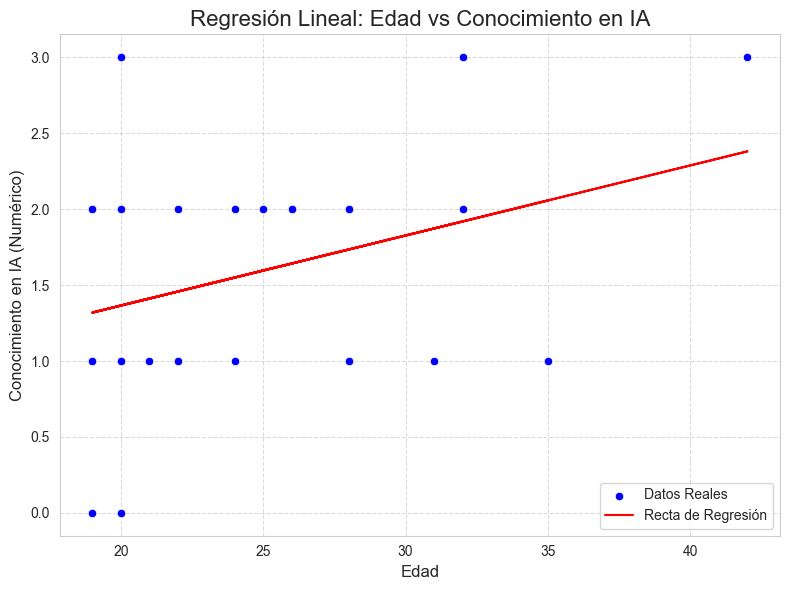

In [9]:
# Generar predicciones para la recta de regresión
y_pred = modelo.predict(X)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Edad'], y=df['Conocimiento_IA_Num'], color='blue', label='Datos Reales')
plt.plot(df['Edad'], y_pred, color='red', label='Recta de Regresión')
plt.title("Regresión Lineal: Edad vs Conocimiento en IA", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Conocimiento en IA (Numérico)", fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Explicación del Gráfico:
- Los puntos azules representan los datos reales de la encuesta.
- La línea roja muestra la recta de regresión ajustada, que minimiza la suma de los errores cuadrados entre los datos reales y la predicción.

**Interpretación:**
La pendiente de la recta indica cómo cambia el nivel de conocimiento en IA conforme aumenta la edad.

---

### **Problema 4: Error Estándar de Estimación**

### Descripción:
Calculamos el **error estándar de estimación** para evaluar la precisión del modelo de regresión lineal ajustado.

---


In [10]:
# Calcular el error estándar de estimación
residuos = y - y_pred  # Diferencia entre valores reales y predichos
error_estandar = np.sqrt(np.sum(residuos**2) / (len(y) - 2))

print(f"Error Estándar de Estimación: {error_estandar:.2f}")


Error Estándar de Estimación: 0.79


### Explicación de la Respuesta:
El **error estándar de estimación** mide cuánto se desvían, en promedio, los valores observados del modelo ajustado.

**Interpretación:**
Un error estándar pequeño indica que el modelo de regresión ajusta bien los datos, mientras que un error grande sugiere que los datos están más dispersos respecto a la recta de regresión.

---
